Task 2: Customer Segmentation Using Unsupervised Learning
---------------------------------------------------------
Objective:
Cluster customers based on spending habits and propose marketing strategies tailored to each

segment.

Dataset:

Mall Customers Dataset
Instructions:

● Conduct Exploratory Data Analysis (EDA)

● Apply K-Means Clustering to segment customers

● Use PCA or t-SNE to visualize the clusters

● Suggest relevant marketing strategies for each identified segment

Skills Gained:

● Unsupervised learning (K-Means)

● Dimensionality reduction (PCA, t-SNE)

● Customer segmentation

● Strategy development based on data insights

In [22]:
# Step 1: Load and Explore the Dataset
import pandas as pd

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first 5 rows
print("First 5 Rows of Dataset:")
display(df.head())

# Shape of dataset
print("\nDataset Shape:", df.shape)

# Info about data types
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\n Missing Values in Each Column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


First 5 Rows of Dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Shape: (200, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

 Missing Values in Each Column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\Muhammad Mamoon\AppData\Local\Temp\ipykernel_25296\4131225463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, palette='coolwarm')


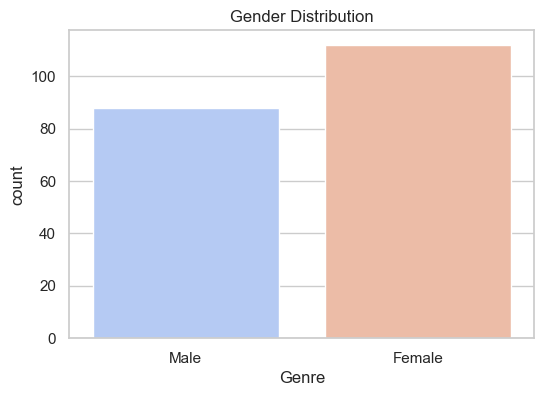

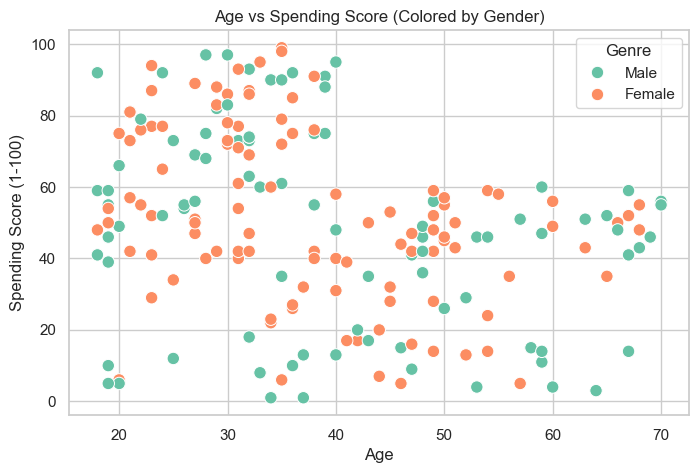

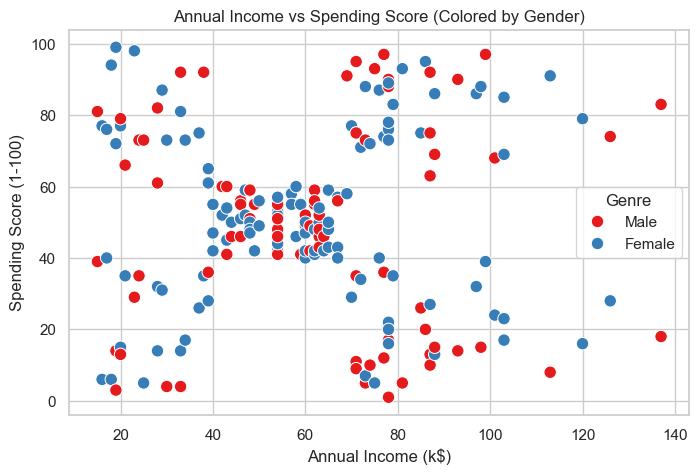

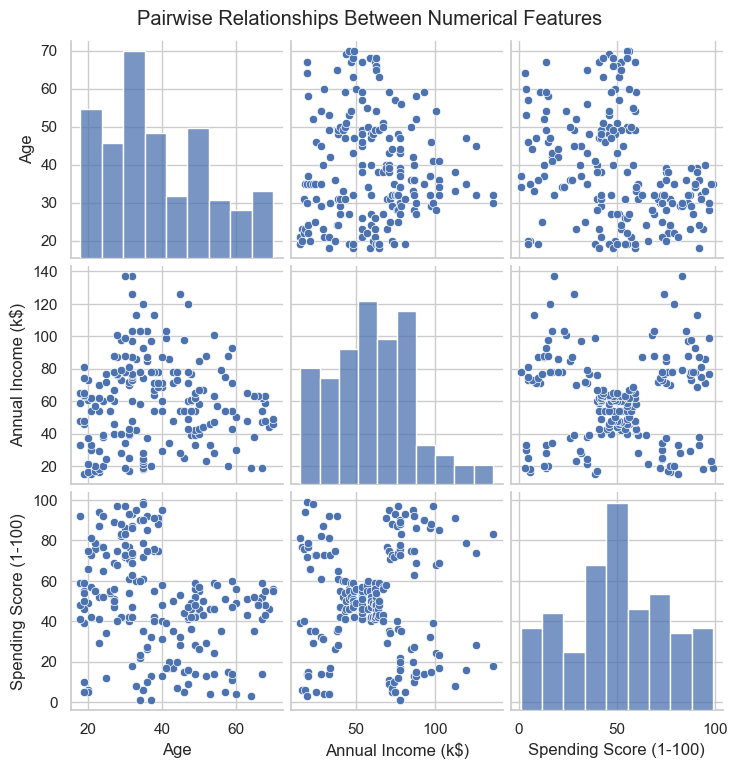

In [23]:
# Step 2: Data Visualization (EDA Part 2)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Gender Distribution (actually Genre)
plt.figure(figsize=(6,4))
sns.countplot(x='Genre', data=df, palette='coolwarm')
plt.title("Gender Distribution")
plt.show()

# Age vs Spending Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Genre', data=df, palette='Set2', s=80)
plt.title("Age vs Spending Score (Colored by Gender)")
plt.show()

# Annual Income vs Spending Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df, palette='Set1', s=80)
plt.title("Annual Income vs Spending Score (Colored by Gender)")
plt.show()

# Pairplot to see overall relationships
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()


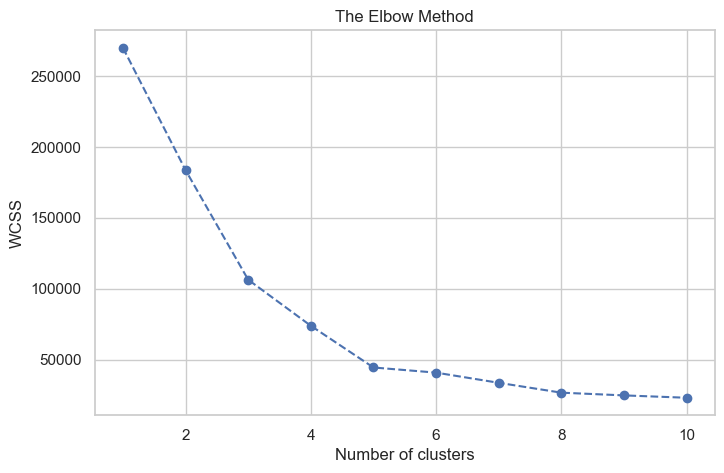

In [24]:
# Step 3.1: Elbow Method to find optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


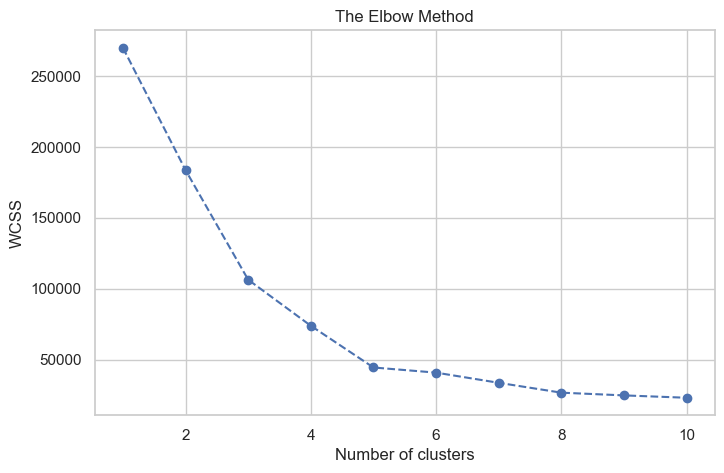

In [25]:
# Step 3.1: Elbow Method to find optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


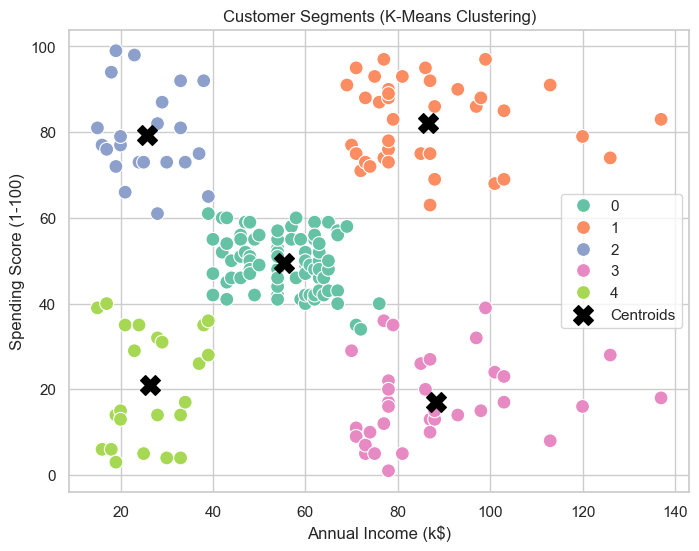

In [26]:
# Step 3.2: Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to original dataframe
df['Cluster'] = y_kmeans

# Step 3.3: Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=df, palette='Set2', s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)
plt.title("Customer Segments (K-Means Clustering)")
plt.legend()
plt.show()


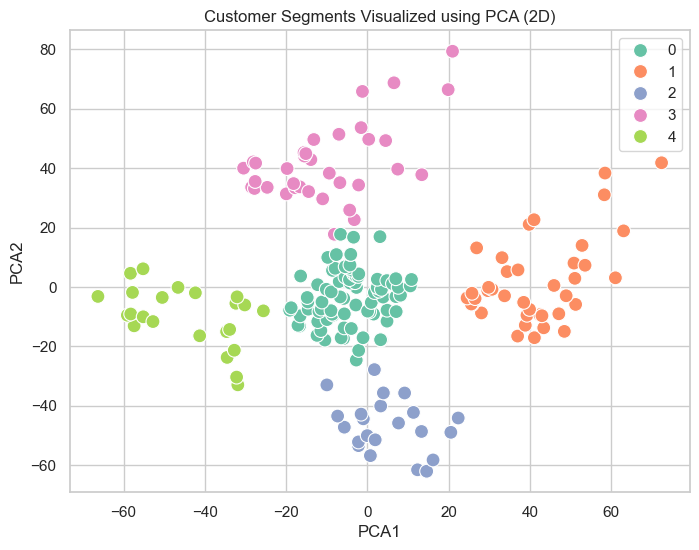

In [27]:
# Step 4: PCA Visualization for Customer Segments
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)

# Add PCA results + cluster labels to dataframe
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Visualize clusters using PCA
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=df,
    palette='Set2',
    s=100
)
plt.title("Customer Segments Visualized using PCA (2D)")
plt.legend()
plt.show()


In [28]:
# Step 4.2: Analyze each cluster's mean characteristics
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary:\n", cluster_summary)

# Explain each cluster (example interpretation)
print("\n💡 Marketing Strategy Suggestions:")
print("""
Cluster 0 → High Income, Low Spending:
   • Financially stable but cautious.
   • Offer premium loyalty programs or exclusive deals.

Cluster 1 → Low Income, Low Spending:
   • Budget-conscious customers.
   • Offer discounts, referral benefits, and affordable bundles.

Cluster 2 → Moderate Income, High Spending:
   • Impulse buyers or socially driven shoppers.
   • Use targeted ads and limited-time offers.

Cluster 3 → High Income, High Spending:
   • Ideal VIP customers.
   • Personalized offers, luxury product recommendations, premium membership.

Cluster 4 → Young, Moderate Income, Varying Spending:
   • Socially active customers.
   • Attract via influencer campaigns and lifestyle marketing.
""")


Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043

💡 Marketing Strategy Suggestions:

Cluster 0 → High Income, Low Spending:
   • Financially stable but cautious.
   • Offer premium loyalty programs or exclusive deals.

Cluster 1 → Low Income, Low Spending:
   • Budget-conscious customers.
   • Offer discounts, referral benefits, and affordable bundles.

Cluster 2 → Moderate Income, High Spending:
   • Impulse buyers or socially driven shoppers.
   • Use targeted ads and limited-time offers.

Cluster 3 → High Income, High Spending:
   • Ideal VIP customers.
   • Personalized offers, l

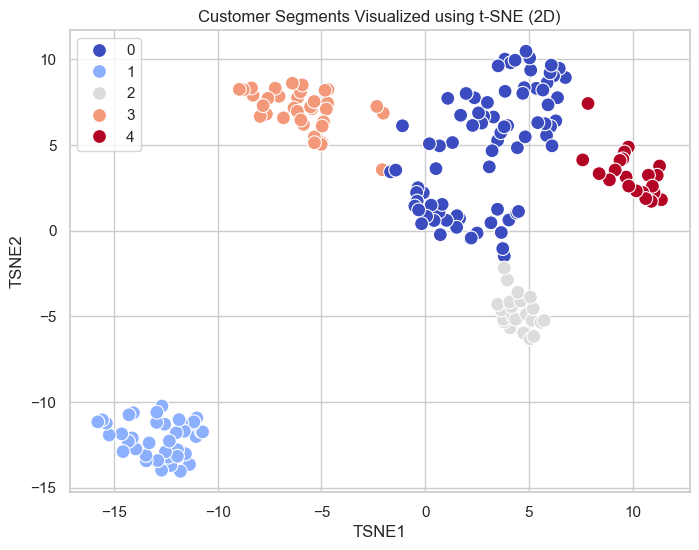

In [29]:
# Step 5: t-SNE Visualization for Clusters (Updated Version)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply t-SNE (latest version fix)
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    learning_rate=200,
    max_iter=1000   # replaced n_iter with max_iter
)

X_tsne = tsne.fit_transform(X)

# Add t-SNE results to dataframe
df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

# Visualize t-SNE clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Cluster', data=df,
    palette='coolwarm', s=100
)
plt.title("Customer Segments Visualized using t-SNE (2D)")
plt.legend()
plt.show()


Based on K-Means clustering, customers were segmented into five distinct behavioral groups using annual income and spending score.
Each segment reflects unique spending habits and financial profiles.
High-income, high-spending customers can be nurtured through VIP programs, while low-income, price-sensitive customers respond better to discount-based campaigns.
Moderate-income, impulsive buyers should be targeted via social media and time-sensitive offers.
Overall, this segmentation allows the bank (or company) to personalize marketing efforts, optimize campaign performance, and improve customer satisfaction.